# Mark Subclip Intervals

This notebook is used to (manually) identify and document a 15-second interval in relevant videos where a humpback whale encounter is evident. 

We repeat a similar process for irrelevant videos, replacing manual interval annotation with a randomly generated 15-second interval. 

The 15-second intervals annotated here will serve as input for training our model. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
#load df of successful video downloads
workspace_path = '/mount/data'
downloads_df = pd.read_csv(workspace_path + '/downloaded_videos.csv')
downloads_df.head()

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4,0:10,0:25
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4,0:44,0:59
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4,0:05,0:20
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4,2:40,2:55
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4,0:00,0:15


# Add a Column to Store Clip Interval 
(only run this once)

In [33]:
# downloads_df['clip_start'] = [''for i in range(0, len(downloads_df))]
# downloads_df['clip_end'] = ['' for i in range(0, len(downloads_df))]

# downloads_df.head()

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4,,
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4,,
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4,,
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4,,
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4,,


# Relevant Subclip Annotation

In [3]:
#functions to double check relevance of each new potential video
from IPython.display import YouTubeVideo, Image, display, Video, HTML

def display_video(index, video_title, url):
    # display video - need to pass in videoID (at end of url) 
    print("{}: {}".format(index, video_title))
    print(url)
    videoID = url.split('/')[3]
    display(YouTubeVideo(videoID))

def get_occurence_intervals():
    '''allows user to enter occurence interval start + end time'''

    start = input('Clip Start Time: ')
    end = input('Clip End Time:   ')

    return start, end

How many videos do you want to annotate?: 

 10


121: video_0156.mp4
https://youtu.be/UHFri3w2Ezo


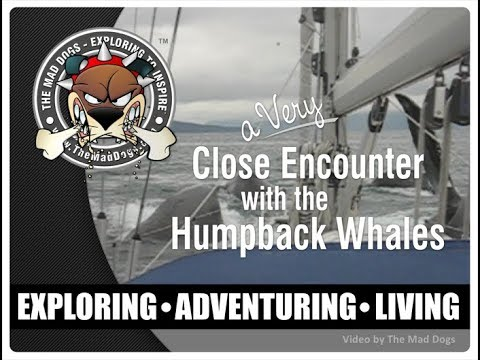

Clip Start Time:  0:10
Clip End Time:    0:25


122: video_0158.mp4
https://youtu.be/i3iC-VNfMMw


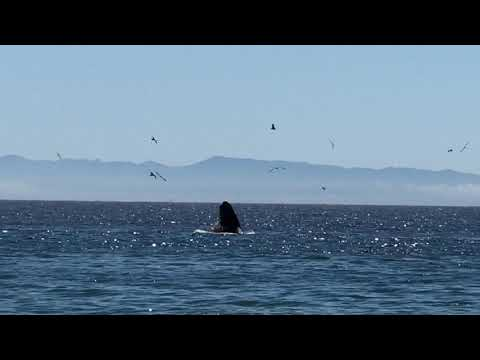

Clip Start Time:  0:34
Clip End Time:    0:49


123: video_0159.mp4
https://youtu.be/z9Bz-y7QSF8


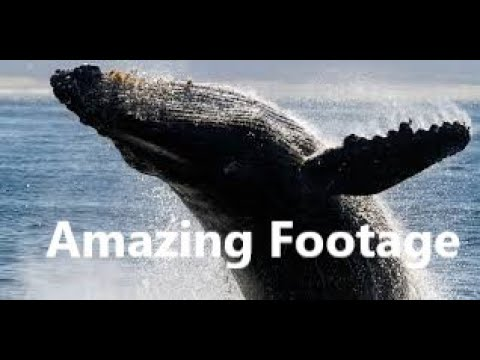

Clip Start Time:  0:30
Clip End Time:    0:42


124: video_0161.mp4
https://youtu.be/SXiKx7V8otI


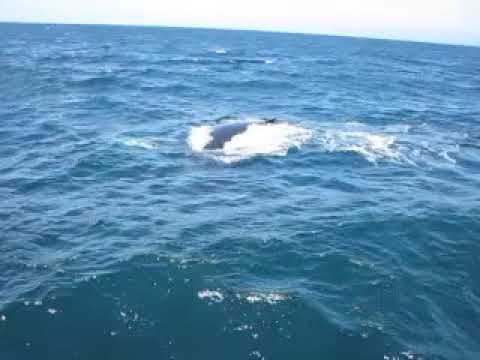

Clip Start Time:  0:15
Clip End Time:    0:30


125: video_0162.mp4
https://youtu.be/FAMnckH8N_Y


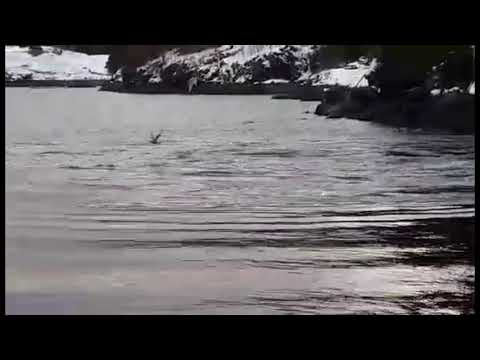

Clip Start Time:  0:00
Clip End Time:    0:05


127: video_0164.mp4
https://youtu.be/NsijYD_F3qA


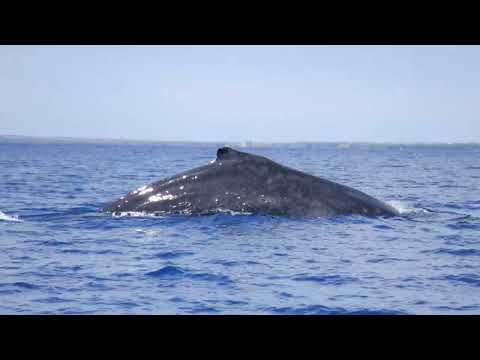

Clip Start Time:  0:30
Clip End Time:    0:45


128: video_0165.mp4
https://youtu.be/4N_zwuDxBa0


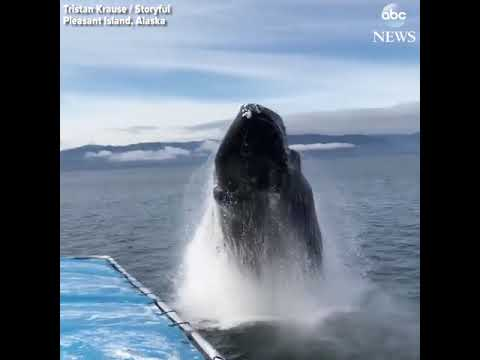

Clip Start Time:  0:00
Clip End Time:    0:15


129: video_0166.mp4
https://youtu.be/FeWNiyNH6vY


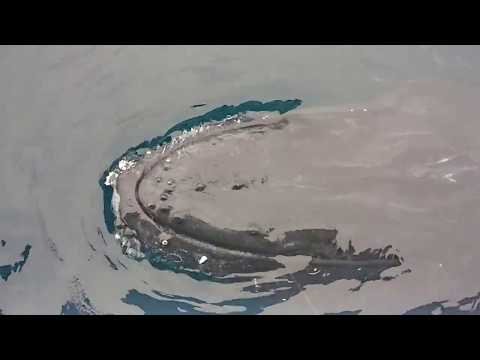

Clip Start Time:  0:00
Clip End Time:    0:15


131: video_0168.mp4
https://youtu.be/nyxaX_AywxQ


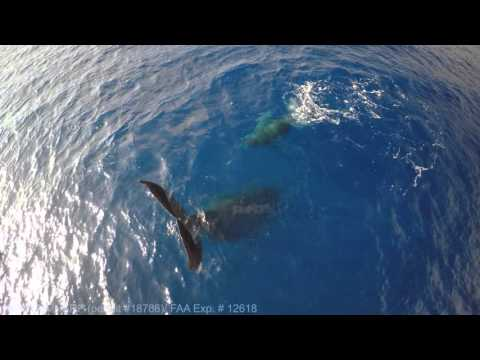

Clip Start Time:  0:00
Clip End Time:    0:15


132: video_0169.mp4
https://youtu.be/rbLmyEEwlws


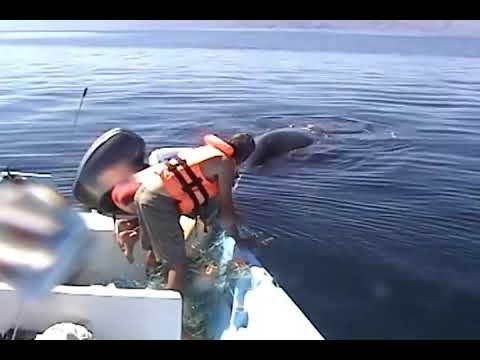

Clip Start Time:  7:28
Clip End Time:    7:43


Done annotating videos 121 to 132 



In [4]:
#loop through relevant videos and annotate whale encounter intervals
print('How many videos do you want to annotate?:', end = " ")
num_videos = int(input())

#pickup on the next relevant video w/o a clip interval
video_indices_to_annotate = list(downloads_df[(downloads_df.clip_start.isna()) & (downloads_df.relevant == True)].index)

#annotate clip intervals and record in dataset
for i in video_indices_to_annotate[:num_videos]:
    row = downloads_df.loc[i]
    display_video(i, row['renamed_title'], row['url'])
    clip_start, clip_end = get_occurence_intervals()
    downloads_df.at[i, ('clip_start')] = clip_start
    downloads_df.at[i, ('clip_end')] = clip_end   
    
print(f'Done annotating videos {video_indices_to_annotate[0]} to {video_indices_to_annotate[num_videos-1]} \n')

In [5]:
#checking updates
downloads_df[(downloads_df.clip_start.notna()) & (downloads_df.relevant == True)][-4:]

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
128,4N_zwuDxBa0,https://youtu.be/4N_zwuDxBa0,Humpback soaks whale watchers off Alaska,creativeCommon,True,video_0165.mp4,0:00,0:15
129,FeWNiyNH6vY,https://youtu.be/FeWNiyNH6vY,Humpback Whale surfacing beside our boat.,creativeCommon,True,video_0166.mp4,0:00,0:15
131,nyxaX_AywxQ,https://youtu.be/nyxaX_AywxQ,NOAA unmanned technologies center captures rar...,creativeCommon,True,video_0168.mp4,0:00,0:15
132,rbLmyEEwlws,https://youtu.be/rbLmyEEwlws,Humpback Whale Shows AMAZING Appreciation Afte...,creativeCommon,True,video_0169.mp4,7:28,7:43


In [6]:
print(len(downloads_df[(downloads_df.clip_start.isna()) & (downloads_df.relevant == True)]), 'more relevant videos to annotate')

80 more relevant videos to annotate


# Save Changes

In [7]:
# update csv with annotated intervals
downloads_df.to_csv(workspace_path + '/downloaded_videos.csv', index=False)
downloads_df.to_csv('/workspace/youtube-humpback-whale-classifier/data/downloaded_videos.csv', index=False)